## Représentation des graphiques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Lecture des données

df  = pd.read_csv("wine/wine.data", sep=",", header=None,  names=["class", "Alcohol","Malic acid","Ash","Alcanity of Ash","Magnesium","Total phenol","Flavanoids","NonFlavanoids phenols","preonthocyanins","color intensity","Hue","OD280/OD315 of diluted wines","proline"])
df.head()

,class,Alcohol,Malic acid,Ash,Alcanity of Ash,Magnesium,Total phenol,Flavanoids,NonFlavanoids phenols,preonthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


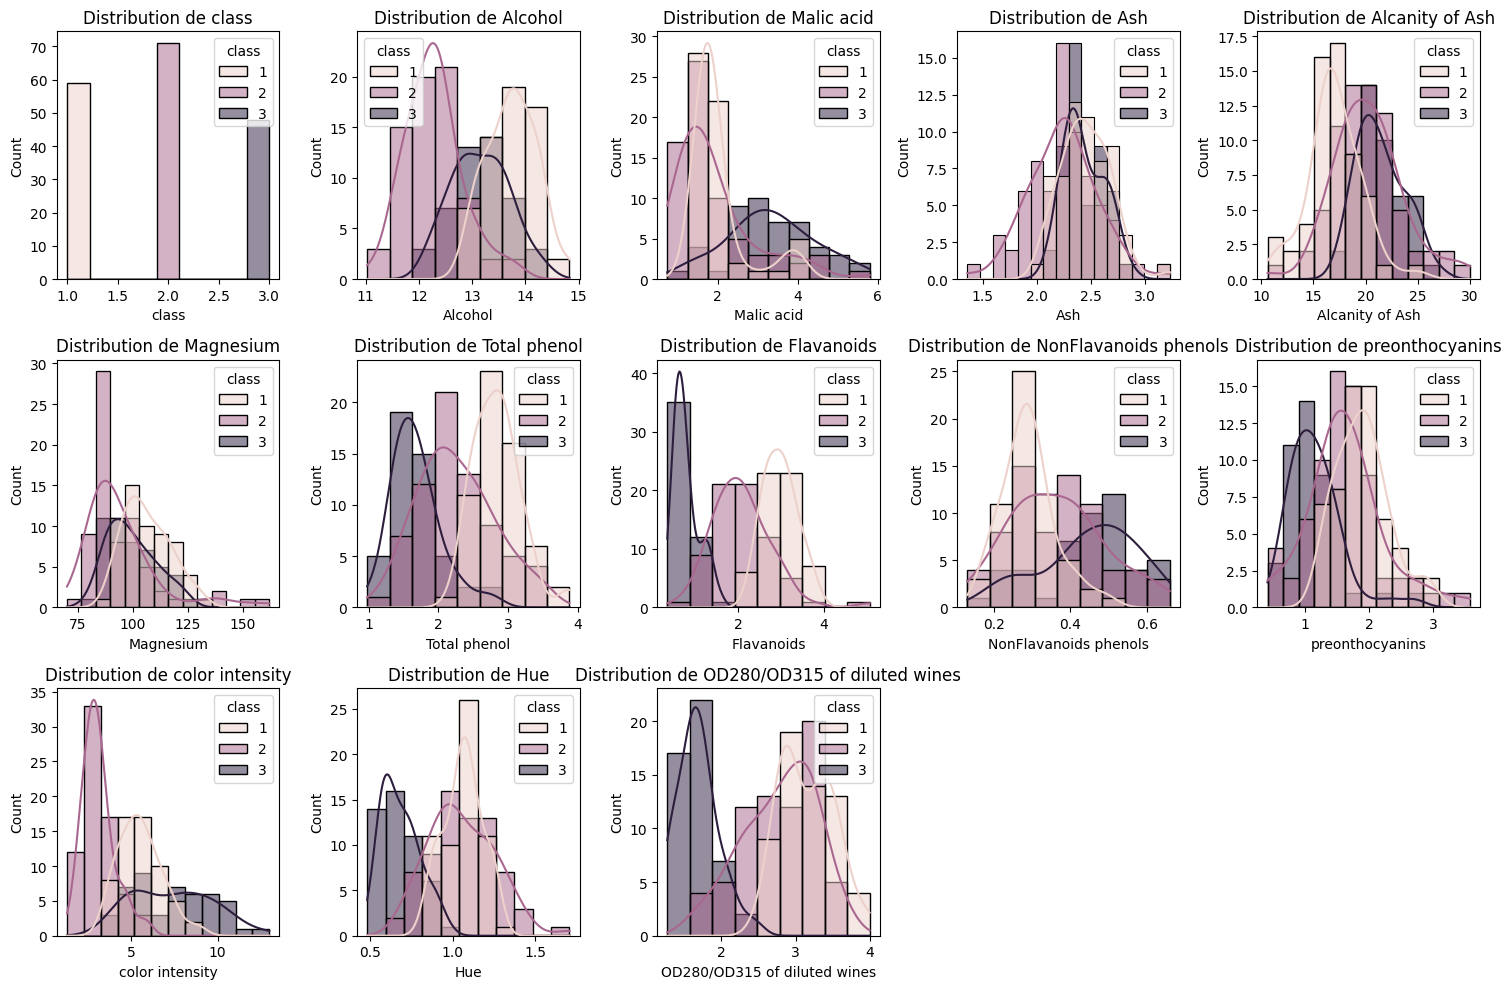

In [3]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):  # exclure la classe
    plt.subplot(3, 5, i+1)
    sns.histplot(data=df, x=col, hue='class', kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


### Discrétisation

* Interval égal

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcanity of Ash               178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenol                  178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   NonFlavanoids phenols         178 non-null    float64
 9   preonthocyanins               178 non-null    float64
 10  color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  proli

In [26]:
print("\n On définit l'intervalle à 8 pour magnésium")


 On définit l'intervalle à 8 pour magnésium


In [16]:
n_intervalles = 8
labels = [f'A{i+1}' for i in range(n_intervalles)]

df["Magnésium discrédisé"] = pd.cut(df['Magnesium'], bins=n_intervalles, labels=labels)
df["Magnésium discrédisé"]

0      A5
1      A3
2      A3
3      A4
4      A5
       ..
173    A3
174    A3
175    A5
176    A5
177    A3
Name: Magnésium discrédisé, Length: 178, dtype: category
Categories (8, object): ['A1' < 'A2' < 'A3' < 'A4' < 'A5' < 'A6' < 'A7' < 'A8']

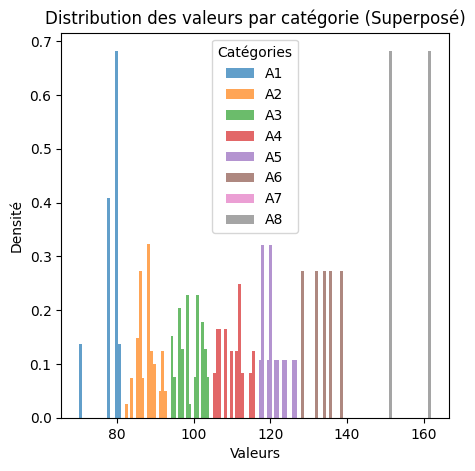

In [25]:
plt.figure(figsize=(5,5))
for i, categorie in enumerate(labels):
    data_cat = df[df['Magnésium discrédisé'] == categorie]['Magnesium']
    plt.hist(data_cat, bins=15, alpha=0.7, label=categorie, density=True)

plt.title('Distribution des valeurs par catégorie (Superposé)')
plt.xlabel('Valeurs')
plt.ylabel('Densité')
plt.legend(title='Catégories')
plt.show()

* Fréquence égale

In [28]:
#Variable Total Phenol
#Nous utiliserons les 4 quartiles

df['quartiles Total phenol'] = pd.qcut(df['Total phenol'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

print("Distribution par fréquence égale (4 quantiles):")
print(df['quartiles Total phenol'].value_counts().sort_index())

Distribution par fréquence égale (4 quantiles):
quartiles Total phenol
Q1    45
Q2    44
Q3    47
Q4    42
Name: count, dtype: int64


* CLustering

In [30]:
#Soit les 2 variables plus haut ie  - Total phenol et - Magnesium, On y ajoute color intensity et Hue

#Méthode du coude pour  déterminer la valeur de k
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

features_for_clustering = ["Total phenol", "Magnesium", "color intensity", "Hue"]

df_to_scale = df[features_for_clustering]

scaler=StandardScaler()
scaled_features = scaler.fit_transform(df_to_scale)

print(f"Les Dimension de jeu clean: {df.shape}")
print("Info sur le jeu de data clean")
df.info()

Les Dimension de jeu clean: (178, 16)
Info sur le jeu de data clean
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   class                         178 non-null    int64   
 1   Alcohol                       178 non-null    float64 
 2   Malic acid                    178 non-null    float64 
 3   Ash                           178 non-null    float64 
 4   Alcanity of Ash               178 non-null    float64 
 5   Magnesium                     178 non-null    int64   
 6   Total phenol                  178 non-null    float64 
 7   Flavanoids                    178 non-null    float64 
 8   NonFlavanoids phenols         178 non-null    float64 
 9   preonthocyanins               178 non-null    float64 
 10  color intensity               178 non-null    float64 
 11  Hue                           178 non-null

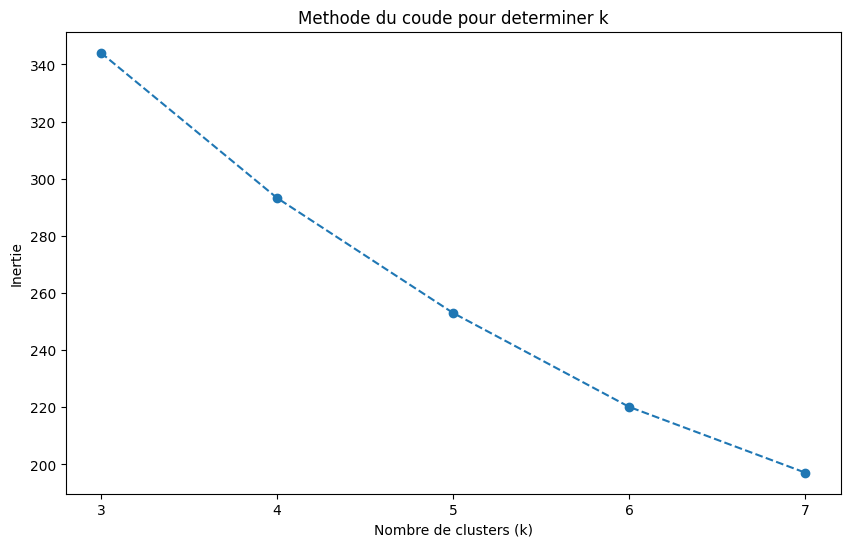

In [31]:
inertia=[]
K_range= range(3, 8)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=20, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Methode du coude pour determiner k')
plt.xticks(K_range)
plt.show()

In [35]:
 #On gardera k = 5
k=5
kmeans=KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)
print(df['Cluster'].max())
print(df['Cluster'].min())

np.int32(0)